<a href="https://colab.research.google.com/github/mckang6113875/AP_Test_OPEN/blob/main/FishEye_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! git clone https://github.com/mckang6113875/AP_Test_OPEN.git

Cloning into 'AP_Test_OPEN'...
remote: Enumerating objects: 329, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 329 (delta 2), reused 0 (delta 0), pack-reused 322
Receiving objects: 100% (329/329), 196.32 MiB | 11.85 MiB/s, done.
Resolving deltas: 100% (204/204), done.


In [4]:
#import cv2
#import matplotlib.pyplot as plt
#original = cv2.imread('/content/AP_Test_OPEN/ViewMode_R.bmp')
#original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
#
#img = cv2.imread('/content/AP_Test_OPEN/ViewMode_R.bmp')
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#
#fig = plt.figure(figsize=(20, 10))
#plt.imshow(original)
#plt.title('SX2 Rear Original')
#plt.grid(color='white', linestyle='--', linewidth=1)
#plt.xticks(np.arange(0, original.shape[1], 50));
#plt.yticks(np.arange(0, original.shape[0], 50));
#print(original.shape)

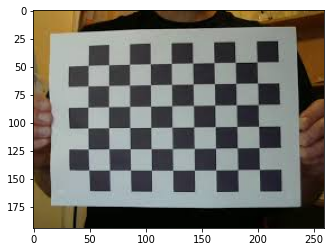

In [7]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('/content/AP_Test_OPEN/ChessBoard_3.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

origin = cv2.imread('/content/AP_Test_OPEN/ChessBoard_3.jpg')
origin = cv2.cvtColor(origin, cv2.COLOR_BGR2RGB)
plt.imshow(img)